In [1]:
import matplotlib.pyplot as plt
import scipy.misc as scpm
import pandas as pd
import glob
import numpy as np
import shelve

%matplotlib inline

In [118]:
import cv2
import os

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

Using TensorFlow backend.
//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Action - 715
SciFi - 267
Drama - 1767
Romance - 447

In [281]:
movie_csv_path = "/Volumes/TSARSHAH/Datasets/Manas/Movie-Posters/movie_poster.csv"
posters_path = "/Users/HarshavardhanK/Desktop/Media/posters"

In [5]:
data_ = pd.read_csv(movie_csv_path)
data_.head()

,tid,title,url,image_url,year,action,scifi,drama,romance
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,http://www.imdb.com/title/tt0120737/,https://m.media-amazon.com/images/M/MV5BN2EyZj...,2001,True,False,False,False
1,tt0167260,The Lord of the Rings: The Return of the King,http://www.imdb.com/title/tt0167260/,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,2003,True,False,False,False
2,tt0167261,The Lord of the Rings: The Two Towers,http://www.imdb.com/title/tt0167261/,https://m.media-amazon.com/images/M/MV5BNGE5Mz...,2002,True,False,False,False
3,tt0169102,Lagaan: Once Upon a Time in India,http://www.imdb.com/title/tt0169102/,https://m.media-amazon.com/images/M/MV5BNDYxNW...,2001,False,False,True,False
4,tt0211915,Amélie,http://www.imdb.com/title/tt0211915/,https://m.media-amazon.com/images/M/MV5BNDg4Nj...,2001,False,False,False,True


In [6]:
data = data_.drop(['image_url', 'url', 'year'], axis = 1)

In [7]:
data.head()

,tid,title,action,scifi,drama,romance
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,True,False,False,False
1,tt0167260,The Lord of the Rings: The Return of the King,True,False,False,False
2,tt0167261,The Lord of the Rings: The Two Towers,True,False,False,False
3,tt0169102,Lagaan: Once Upon a Time in India,False,False,True,False
4,tt0211915,Amélie,False,False,False,True


In [282]:
image_glob = glob.glob(posters_path + "/" + "*.jpg")
img_dict = {}
print(len(image_glob))

5963


In [9]:
def get_id(filename):
    
    index_s = filename.rfind("/t") + 3
    index_f = filename.rfind('.jpg')
    
    return filename[index_s:index_f]

In [10]:
def get_images_batches(startIndex, endIndex):
    
    image_dict = {}
    
    for i in range(startIndex, endIndex):
        
        _id = get_id(image_glob[i])
        #print(_id)
        
        if startIndex >= len(image_glob) or endIndex >= len(image_glob):
            print("Index out of range")
            return None
        
        try:
            image_dict[_id] = scpm.imread(image_glob[i])
            
        except:
            print("Unable to read images")
            pass
        
    
    
    return image_dict

In [11]:
def get_img_dict(interval_size, batch_size, k = 0, batch=1):
    
    shelf = shelf_open()
    
    start = (batch - 1) * interval_size
    end = start + interval_size
    
    try:
        
        j = k
    
        for i in range(start, end, batch_size):
        
            dict_ = get_images_batches(i, i + batch_size)
        
            #name = 'img' + str(j) + "_dict"
            #print("Name is {}".format(name))
        
            j += 1
        
            #shelf[name] = dict_
    
    except Exception as e:
        print(e)
        shelf.close()
    
    print('DONE')
    
    shelf.close()
    
    return j

In [12]:
images_dict = get_images_batches(0, 100)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [74]:
for _id, img in images_dict.items():
    #print(img.shape)
    
    if(img.shape[2] == 4):
        print('y')
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        images_dict[_id] = img

In [75]:
print(images_dict['0371746'].shape)

(2048, 1382, 3)


In [76]:
action_movies = data.loc[data['action'] == True]
scifi_movies= data.loc[data['scifi'] == True]
romance_movies = data.loc[data['romance'] == True]

action_tid, scifi_tid, romance_tid = action_movies['tid'], scifi_movies['tid'], romance_movies['tid']

action_tid = np.array(action_tid)
scifi_tid = np.array(scifi_tid)
romance_tid = np.array(romance_tid)

In [77]:
print(len(action_movies), len(scifi_movies), len(romance_movies))

711 263 443


In [78]:
print(len(action_tid))
#print(action_tid)

711


In [99]:
datagen = ImageDataGenerator(
    rotation_range=50, 
    width_shift_range=0.3, 
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

def generate_duplicates(image, directory, poster_id, copies):
    
    image = image.reshape((1,) + image.shape)
    
    i = 0
    
    for batch in datagen.flow(image, save_to_dir= directory, save_prefix=poster_id, save_format='jpg'):
        
        i += 1
    
        if i >= copies:
            break

In [104]:
action_dup = "/Users/HarshavardhanK/Desktop/Media/action_dups"
scifi_dup = "/Users/HarshavardhanK/Desktop/Media/scifi_dups"
romance_dup = "/Users/HarshavardhanK/Desktop/Media/romance_dups"

new_posters_path = "/Users/HarshavardhanK/Desktop/Media/posters"

In [101]:
def get_tid(filename):
    
    index_s = filename.rfind("/t") + 1
    index_f = filename.rfind('.jpg')
    
    return filename[index_s:index_f]

In [143]:
def generate_augmented_duplicates(poster_ids, directory, copies):
    
    new_image_glob = glob.glob(new_posters_path + '/' + '*.jpg')
    
    for path in new_image_glob:
        poster_id = get_tid(path)
        
        
        try:
            
            image = scpm.imread(path)
        
            if len(image.shape) != 3 or image.shape[2] == 4:
                continue
        
            if poster_id in poster_ids:
                #print(poster_id)
                generate_duplicates(image, directory, poster_id, copies)
        
        except:
            pass
    
    print("Done generating augmented duplicated. Saved in {}".format(directory))
            

In [144]:
generate_augmented_duplicates(scifi_tid, scifi_dup, 6)
generate_augmented_duplicates(romance_tid, romance_dup, 3)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Done generating augmented duplicated. Saved in /Users/HarshavardhanK/Desktop/Media/scifi_dups
Done generating augmented duplicated. Saved in /Users/HarshavardhanK/Desktop/Media/romance_dups


In [145]:
generate_augmented_duplicates(action_tid, action_dup, 1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Done generating augmented duplicated. Saved in /Users/HarshavardhanK/Desktop/Media/action_dups


In [177]:
def get_tid_dups(filename):
    
    index_s = filename.rfind("/t") + 1
    index_0 = filename.rfind('_0')
    index_f = filename.rfind('.jpg')
    
    name = filename[index_s:index_f]
    #print(name)
    
    return name

In [171]:
def rename_posters(directory, naming_dict):
    
    local_glob = glob.glob(directory + '/' + '*.jpg')
    print("{} items to rename".format(len(local_glob)))
    i = 0
    
    for path in local_glob:
        
        try:
        
            l = len(naming_dict)
        
            name = directory + '/' + get_tid_dups(path, naming_dict[i % l])
            print("{} to {}".format(path, name))
            os.rename(path, name)
        
            i += 1
        
        except Exception as e:
            print(e)
            
    
    print("DONE renaming")

# dummy_path = '/Users/HarshavardhanK/Desktop/Media/tt0035423_0_1480.jpg'
#renam = get_tid_dups(dummy_path)
#print(renam)
#os.rename(dummy_path, '/Users/HarshavardhanK/Desktop/Media/' + renam)

In [173]:
romance_path = "/Users/HarshavardhanK/Desktop/Media/romance_dups copy"
romance_naming_dict = {0:'A', 1:'B', 2:'C'}

action_path = '/Users/HarshavardhanK/Desktop/Media/action_dups copy'
action_naming_dict = {0:'A'}

scifi_path = '/Users/HarshavardhanK/Desktop/Media/scifi_dups copy'
scifi_naming_dict = {0:'A', 1:'B', 2:'C', 3: 'D', 4: 'E', 5: 'F'}

#rename_posters(romance_path, romance_naming_dict)

In [95]:
def image_resize(image, size=(280, 256)):
    
    image = scpm.imresize(image, size)
    image = image.astype(np.float32)
    image = (image / 127.5) - 1
    
    return image

In [96]:
def resize_save(save_path):
    
    #local_glob = glob(posters_path + '/' + '*.jpg')
    i = 0
    
    for path in image_glob:
        
        i += 1
        print("Image count: {}".format(i))
        
        img_save_path = save_path + '/' + get_tid(path) + '.jpg'
        image = scpm.imread(path)
        
        if (len(image.shape) != 3) or image.shape[2] == 4:
            continue
        
        image = image_resize(image, size=(280, 256))
        scpm.imsave(img_save_path, image)
    
    print("DONE")

In [187]:
action_path = "/Users/HarshavardhanK/Desktop/Media/posters/action_dups"
scifi_path = "/Users/HarshavardhanK/Desktop/Media/posters/scifi_dups"
romance_path = "/Users/HarshavardhanK/Desktop/Media/posters/romance_dups"

In [280]:
action_dup_glob = glob.glob(action_path + '/' + '*.jpg')
scifi_dup_glob = glob.glob(action_path + '/' + '*.jpg')
romance_dup_glob = glob.glob(action_path + '/' + '*.jpg')

print(len(action_dup_glob))
print(len(scifi_dup_glob))

0
0


In [189]:
#resize_save(save_path)

In [190]:
def get_tids_dups(dup_glob):
    tids = []
    
    for path in dup_glob:
        name = get_tid_dups(path)
        tids.append(name)
    
    print('DONE')
    return tids
    

In [194]:
action_tids_dups = get_tids_dups(action_dup_glob)
scifi_tids_dups = get_tids_dups(scifi_dup_glob)
romance_tids_dups = get_tids_dups(romance_dup_glob)

#print(scifi_tids_dups)

DONE
DONE
DONE


In [192]:
def get_sliced_tids(name):
    return name[0:9]

print(action_tids_dups[0])
print(get_sliced_tids(action_tids_dups[0]))
print(get_sliced_tids(scifi_tids_dups[0]))

tt0371920_0_3633
tt0371920
tt0371920


In [257]:
this_row = data.loc[data['tid'] == 'tt0371920']
print(this_row)

def append_tid_to_dataframe(df, tids):
    
    for tid in tids:
        
        #print(tid)
    
        req_row_tid = get_sliced_tids(tid)
        req_row = df.loc[df['tid'] == req_row_tid]
    
        add_row = req_row.copy()
        add_row['tid'] = tid
    
        #print(add_row)
    
        df = df.append(add_row)
    
    return df
    
    print('Done..')
    

           tid         title action scifi  drama romance
860  tt0371920  Rottweiler     True  True  False   False


In [ ]:
df = data.copy()

df_action = append_tid_to_dataframe(df, action_tids_dups)
df_scifi = append_tid_to_dataframe(df_action, scifi_tids_dups)
df_romance = append_tid_to_dataframe(df_scifi, romance_tids_dups)

In [279]:


print(len(df))

print(len(scifi_tids_dups))
print(len(df_action))
print(len(df_scifi))
print(len(df_romance))

2455
700
3155
3855
4555


In [277]:
final_dataframe = df_romance.copy()
final_dataframe.head()

,tid,title,action,scifi,drama,romance
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,True,False,False,False
1,tt0167260,The Lord of the Rings: The Return of the King,True,False,False,False
2,tt0167261,The Lord of the Rings: The Two Towers,True,False,False,False
3,tt0169102,Lagaan: Once Upon a Time in India,False,False,True,False
4,tt0211915,Amélie,False,False,False,True


In [268]:
final_dataframe.to_csv('final_movie_posters.csv', sep=',', encoding='utf-8')

In [287]:
new_df = pd.read_csv('final_movie_posters.csv')
new_df = new_df.sample(frac=1).reset_index(drop=True)

new_df.head()

,Unnamed: 0,tid,title,action,scifi,drama,romance
0,877,tt0377818_0_8471,The Dukes of Hazzard,True,False,False,False
1,241,tt0353014_0_7611,Wonderful Days,True,False,False,False
2,1825,tt0823333,Blade: The Series,True,False,False,False
3,1817,tt0814203,Macbeth,False,False,True,False
4,1008,tt0443706,Zodiac,False,False,True,False


In [288]:
def display_poster(poster_id):
    
    row = data.loc[data['tid'] == "tt" + poster_id]
    #print(row)
    title = row['title'].values[0]
    
    genre = ""
    
    action = row['action'].values[0]
    scifi = row['scifi'].values[0]
    drama = row['drama'].values[0]
    rom = row['romance'].values[0]
    
    if action:
        genre += '|Action|'
    if rom:
        genre += '|Romance|'
    if drama:
        genre += '|Drama|'
    if scifi:
        genre += '|Sci-Fi|'
        
    
    plt.title("{} \n {}".format(title, genre))
    plt.imshow(img0_dict[poster_id])

NameError: name 'img0_dict' is not defined

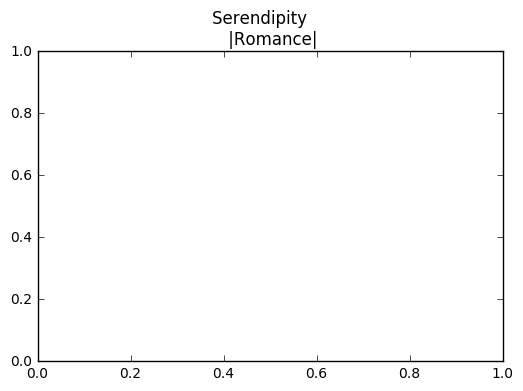

In [289]:
display_poster('0240890')


In [140]:
def image_resize(image, size=(150, 101)):
    
    image = scpm.imresize(image, size)
    image = image.astype(np.float32)
    image = (image / 127.5) - 1
    
    return image
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


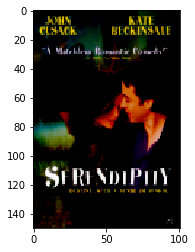

In [141]:
resized_img = image_resize(img0_dict['0240890'])
plt.imshow(resized_img)

In [142]:
data.head()

,tid,title,action,scifi,drama,romance
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,True,False,False,False
1,tt0167260,The Lord of the Rings: The Return of the King,True,False,False,False
2,tt0167261,The Lord of the Rings: The Two Towers,True,False,False,False
3,tt0169102,Lagaan: Once Upon a Time in India,False,False,True,False
4,tt0211915,Amélie,False,False,False,True


In [143]:
def genres_per_movie(_id, data):
    
    row = data.loc[data['tid'] == "tt" + _id]
    genres = []
    
    if row['action'].values[0]:
        genres.append('action')
    if row['scifi'].values[0]:
        genres.append('scifi')
    if row['drama'].values[0]:
        genres.append('drama')
    if row['romance'].values[0]:
        genres.append('romance')
    
    
    return genres
        

In [154]:
def prepare_data(data, img_dict, size=(150, 101)):
    
    dataset = []
    ids = []
    y = []
    
    label_dict = {'word2id': {'action':0, 'scifi': 1, 'drama': 2, 'romance': 3}, 'id2word': ['action', 'scifi', 'drama', 'romance']}
    num_classes = len(label_dict['id2word'])
    
    print(num_classes)
    
    num_samples = len(img_dict)
    
    print("Have {} samples".format(num_samples))
    
    for key in img_dict:
        
        genres = genres_per_movie(key, data)
        
        image = image_resize(img_dict[key], size)
        one_hot_label = np.sum([np.eye(num_classes, dtype=np.uint8)[label_dict['word2id'][l]] for l in genres], axis = 0, dtype=np.uint8)
        
        dataset.append(image)
        y.append(one_hot_label)
        ids.append(key)
    
    
    print("DONE")
    
    return dataset, y, label_dict, ids
    
    
    

In [147]:
def prepare_big_img_dict(img_dicts):
    
    big_img_dict = {}
    
    for img in img_dicts:
        for key, value in img.items():
            big_img_dict[key] = value
    
    
    return big_img_dict

shelf.close()

In [117]:

img_dicts = collect_img_dicts(shelf)
big_img_dict = prepare_big_img_dict(img_dicts)



In [170]:
for _id, img in big_img_dict.items():

    if(img.shape[2] == 4):
        print('y')
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        big_img_dict[_id] = img

In [171]:
dataset, y, label_dict, ids = prepare_data(data, big_img_dict)

4
Have 200 samples


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


DONE


In [178]:

for img in dataset:
    if img.shape != (150, 101, 3):
        print('dff')


In [189]:
class_weights = {0:2, 1:7, 2:1, 3:3}

In [192]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 101, 3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(),  metrics=['accuracy'])

n = 200
history = model.fit(np.array(dataset[:n]), np.array(y[:n]), batch_size = 10, class_weight=class_weights, epochs = 5, verbose = 1, validation_split = 0.1)

Train on 180 samples, validate on 20 samples
Epoch 1/5
180/180 [==============================] - 14s 76ms/step - loss: 15.0041 - acc: 0.2528 - val_loss: 12.5744 - val_acc: 0.2250
Epoch 2/5
180/180 [==============================] - 13s 70ms/step - loss: 15.7046 - acc: 0.2097 - val_loss: 12.5744 - val_acc: 0.2250
Epoch 3/5
180/180 [==============================] - 12s 69ms/step - loss: 14.4048 - acc: 0.2750 - val_loss: 8.8056 - val_acc: 0.4000
Epoch 4/5
180/180 [==============================] - 13s 75ms/step - loss: 12.4219 - acc: 0.3931 - val_loss: 8.8056 - val_acc: 0.4000
Epoch 5/5
180/180 [==============================] - 15s 81ms/step - loss: 12.9367 - acc: 0.3764 - val_loss: 8.8056 - val_acc: 0.4000


In [193]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


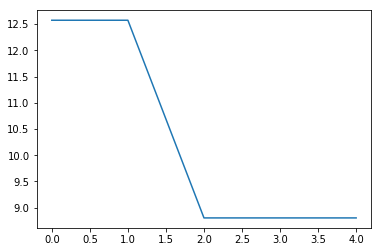

In [194]:
plt.plot(history.history['val_loss'])

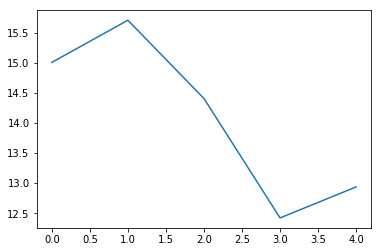

In [195]:
plt.plot(history.history['loss'])

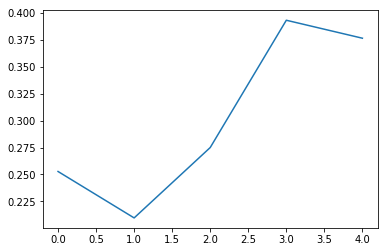

In [196]:
plt.plot(history.history['acc'])

In [274]:
fff = pd.read_csv('final_movie_posters.csv', error_bad_lines = False, encoding='utf-8')

In [275]:
fff.head()
print(len(fff))

4555
